In [1]:
#Usual imports
import os
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## First we import the energy data

In [2]:
#Import the energy data
energy_data_old=pd.read_csv("data\HourlyDemands_1994-2002.csv")
energy_data_recent=pd.read_csv("data\HourlyDemands_2002-2016.csv")
energy_data_this_year=pd.read_csv("data\HourlyDemands.csv")

In [3]:
# Create common columns for all three dataframes
energy_data_old=energy_data_old.rename(columns={'OntarioDemand': 'Ontario Demand'})
energy_data_old['Date']= pd.DatetimeIndex(energy_data_old['DateTime']).date
energy_data_old['Hour']= pd.DatetimeIndex(energy_data_old['DateTime']).hour
energy_data_recent['Date']= pd.DatetimeIndex(energy_data_recent['Date']).date
energy_data_this_year['Date']= pd.DatetimeIndex(energy_data_this_year['Date']).date

In [4]:
# Join all three dataframes together and create a standard datetime column
energy_data_all=pd.concat([energy_data_old,energy_data_recent,energy_data_this_year])
energy_data_all["Date/Time"]=pd.to_datetime(energy_data_all.Date) + energy_data_all.Hour.astype('timedelta64[h]')
# Keep only the Date/Time column and the demand columns
energy_sub = energy_data_all[["Date/Time","Ontario Demand", "Total Market Demand"]]

In [5]:
energy_sub.head(4)

,Date/Time,Ontario Demand,Total Market Demand
0,1994-01-01 00:00:00,14422,NaN
1,1994-01-01 01:00:00,13845,NaN
2,1994-01-01 02:00:00,13372,NaN
3,1994-01-01 03:00:00,13025,NaN


## Import the weather data

In [6]:
# We make a single dataframe from all the csv files in the csv folder
path = "./csv/"
files = os.listdir(path)
files_csv = [f for f in files if f[-3:] == 'csv']
weather_data=pd.DataFrame()
for f in files_csv:
    data = pd.read_csv(path+f,skiprows=16)
    weather_data = weather_data.append(data)

In [7]:
weather_data.head(4)

,Date/Time,Year,Month,Day,Time,Data Quality,Temp (°C),Temp Flag,Dew Point Temp (°C),Dew Point Temp Flag,...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
0,2002-10-01 00:00,2002,10,1,00:00,,19.5,NaN,16.9,NaN,...,M,NaN,M,100.18,NaN,NaN,NaN,NaN,NaN,NaN
1,2002-10-01 01:00,2002,10,1,01:00,,19.2,NaN,17.2,NaN,...,M,NaN,M,100.19,NaN,NaN,NaN,NaN,NaN,NaN
2,2002-10-01 02:00,2002,10,1,02:00,,19.1,NaN,17.3,NaN,...,M,NaN,M,100.17,NaN,NaN,NaN,NaN,NaN,NaN
3,2002-10-01 03:00,2002,10,1,03:00,,19.2,NaN,17.2,NaN,...,M,NaN,M,100.14,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# We merge the two dataframes together
weather_data["Date/Time"]=pd.to_datetime(weather_data["Date/Time"])
weather_merge=pd.merge(weather_data,energy_sub, how="outer",left_on="Date/Time",right_on="Date/Time")

In [9]:
weather_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207456 entries, 0 to 207455
Data columns (total 27 columns):
Date/Time              207456 non-null datetime64[ns]
Year                   207456 non-null int64
Month                  207456 non-null int64
Day                    207456 non-null int64
Time                   207456 non-null object
Data Quality           204634 non-null object
Temp (°C)              204624 non-null float64
Temp Flag              10 non-null object
Dew Point Temp (°C)    204624 non-null float64
Dew Point Temp Flag    10 non-null object
Rel Hum (%)            204624 non-null float64
Rel Hum Flag           10 non-null object
Wind Dir (10s deg)     69305 non-null float64
Wind Dir Flag          129907 non-null object
Wind Spd (km/h)        75005 non-null float64
Wind Spd Flag          129958 non-null object
Visibility (km)        73619 non-null float64
Visibility Flag        21006 non-null object
Stn Press (kPa)        198969 non-null float64
Stn Press Flag     

### Investigate monthly temperature average

In [10]:
yearly_avg=weather_merge.groupby(["Year","Month"]).mean().reset_index()
yearly_avg["year/month"]=pd.to_datetime(yearly_avg[["Year","Month","Day"]])

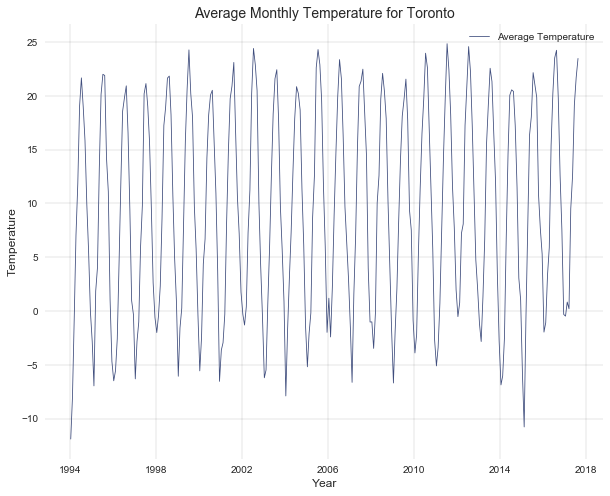

In [11]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
ax.set_facecolor('white')
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()  
ax.grid(color='black', linestyle='-', linewidth=.1)
plt.plot(yearly_avg["year/month"], yearly_avg["Temp (°C)"], color="#3F4D7D", linewidth=0.8,label="Average Temperature")
plt.xlabel('Year', fontsize=12)
plt.ylabel('Temperature', fontsize=12)
plt.title('Average Monthly Temperature for Toronto', fontsize=14)
plt.legend()
plt.show()

** Here we see that monthly average temperatures have not changed too dramatically over the years. The winters of 2014 and especially 2015 look to be outliers in the recent trend of warmer winters of the past six years. **

### Investigate monthly energy demand

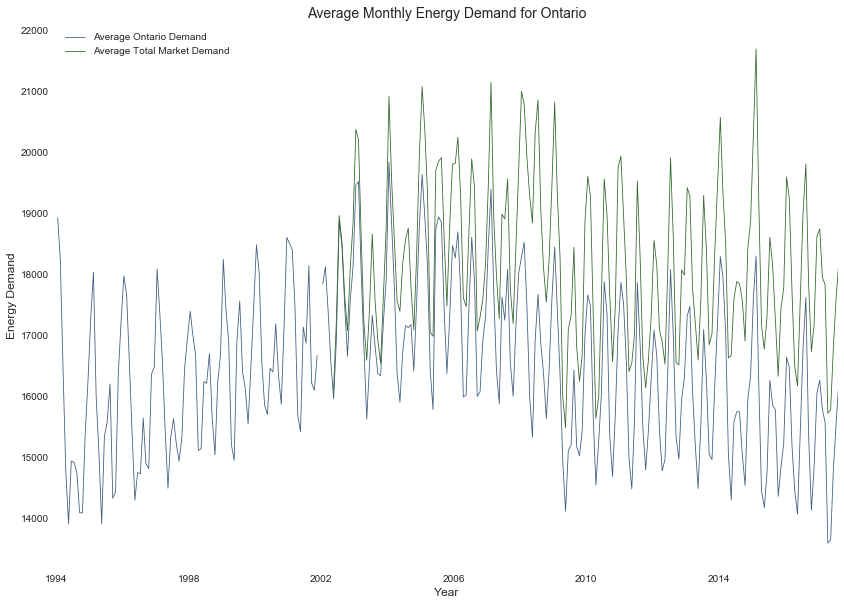

In [12]:
fig, ax = plt.subplots(figsize=(14, 10))
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
ax.set_facecolor('white')
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()  
plt.plot(yearly_avg["year/month"], yearly_avg["Ontario Demand"], color="#3F5D7D", linewidth=0.8,label="Average Ontario Demand")
plt.plot(yearly_avg["year/month"], yearly_avg["Total Market Demand"], color="#34652D", linewidth=0.8,label="Average Total Market Demand")
plt.xlabel('Year', fontsize=12)
plt.ylabel('Energy Demand', fontsize=12)
plt.title('Average Monthly Energy Demand for Ontario', fontsize=14)
plt.xlim(["1994-01-01","2017-07-31"])
plt.legend()
plt.show()

** There's something weird with the drop in energy demand after 2003. The drop in 2009 could also be a result of the recession? It looks like that the spike in energy demand is for the winter of 2015. **

In [13]:
# Now remove NA columns from weather_merge
weather_sub=weather_merge[["Date/Time","Data Quality", "Temp (°C)","Temp Flag" ,"Dew Point Temp (°C)" ,"Dew Point Temp Flag","Rel Hum (%)"    ,"Rel Hum Flag","Wind Dir (10s deg)" ,"Wind Dir Flag"   ,"Wind Spd (km/h)" ,"Wind Spd Flag" ,"Visibility (km)","Visibility Flag" ,"Stn Press (kPa)" ,"Stn Press Flag","Hmdx","Wind Chill","Weather", "Ontario Demand" ,"Total Market Demand"]]

In [14]:
weather_sub.describe()

,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Wind Dir (10s deg),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Hmdx,Wind Chill,Ontario Demand,Total Market Demand
count,204624.000000,204624.000000,204624.000000,69305.000000,75005.000000,73619.000000,198969.000000,32588.000000,16589.000000,206088.000000,133824.000000
mean,9.313238,3.771429,70.503651,22.444499,14.913232,21.264546,99.961146,29.865748,-11.868346,16446.464234,18205.337697
std,10.668125,10.207141,16.412864,9.895402,9.836360,9.570469,0.842791,3.812768,6.391140,2568.770562,2531.071000
min,-30.300000,-36.100000,9.000000,1.000000,0.000000,0.000000,96.550000,25.000000,-40.000000,2270.000000,2270.000000
25%,1.200000,-3.600000,60.000000,14.000000,7.000000,16.100000,99.420000,27.000000,-16.000000,14522.000000,16317.000000
50%,9.400000,3.900000,72.000000,25.000000,13.000000,24.100000,99.980000,29.000000,-11.000000,16433.000000,18128.000000
75%,18.200000,12.300000,83.000000,31.000000,20.000000,25.000000,100.520000,32.000000,-7.000000,18230.000000,19890.000000
max,37.400000,26.700000,100.000000,36.000000,76.000000,40.200000,102.980000,51.000000,-1.000000,27005.000000,27999.000000


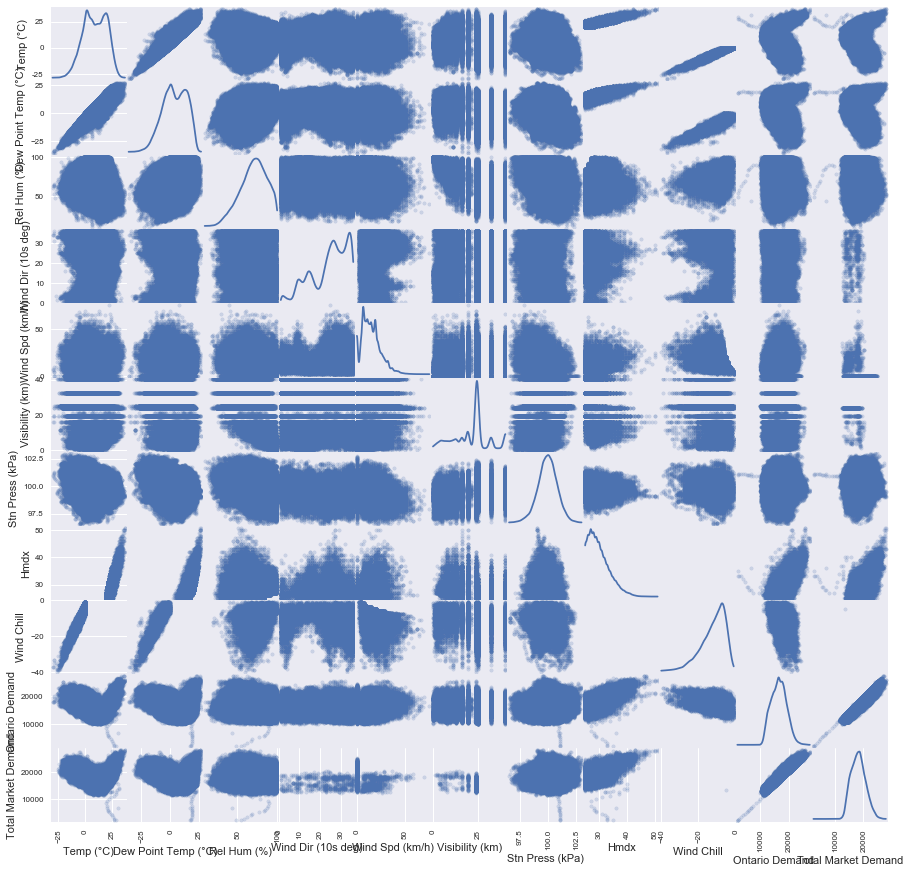

In [15]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(weather_sub,alpha=0.2, figsize=(15, 15), diagonal='kde')
plt.show()

** Most of the variables are normally distributed. We see some suspicious outliers in the energy demand vs temperature and energy demand vs humidex scatter plots. Otherwise there is a very strong correlation between humidex and energy demand and energy demand and a non-linear relationship between temperature and energy demand. The non-linear nature is due to the large demand for heat when the temperature is very low and the large demand for cooling when the temperature is very high. **

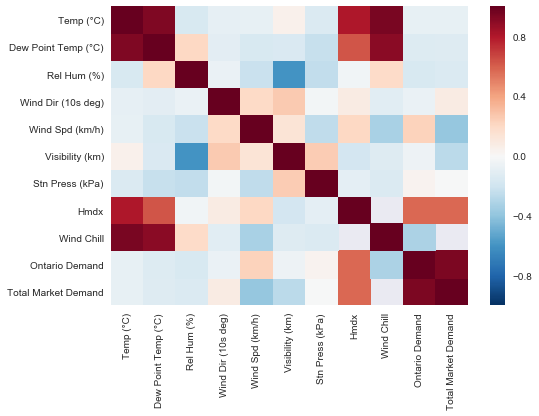

In [16]:
corr = weather_sub.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

## To Do:
- Investigate the outliers.
- Investigate the relationship with both humidex and temperature.
- Look at the spikes in demand, what can we say about what was happening before?
- Look into when the biggest changes occur between hourly energy consumption
- Look into when there is a weather flag. How is energy demand different during those hours?
- Look into rolling averages
- Look into big changes in temperature from mean for that day 

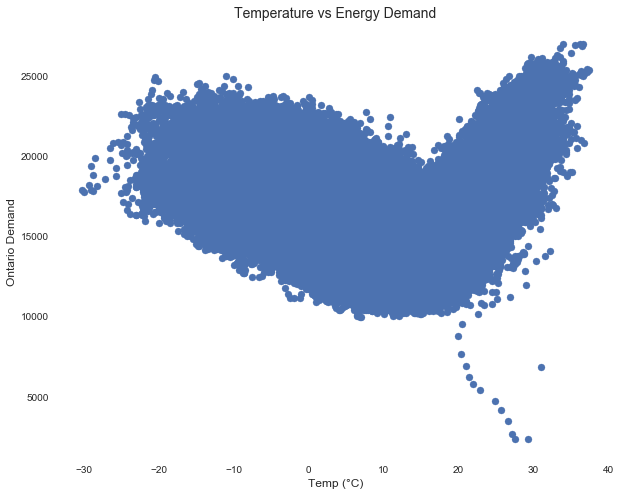

In [17]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
ax.set_facecolor('white')
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()  
plt.scatter(weather_sub["Temp (°C)"], weather_sub["Ontario Demand"])
plt.xlabel('Temp (°C)', fontsize=12)
plt.ylabel('Ontario Demand', fontsize=12)
plt.title('Temperature vs Energy Demand', fontsize=14)
plt.show()

In [18]:
low_energy=weather_sub[weather_sub["Ontario Demand"]<10000]
low_energy["Date/Time"].unique

<bound method Series.unique of 12760    2003-08-14 16:00:00
12761    2003-08-14 17:00:00
12762    2003-08-14 18:00:00
12763    2003-08-14 19:00:00
12764    2003-08-14 20:00:00
12765    2003-08-14 21:00:00
12766    2003-08-14 22:00:00
12767    2003-08-14 23:00:00
12768    2003-08-15 00:00:00
12769    2003-08-15 01:00:00
12770    2003-08-15 02:00:00
12771    2003-08-15 03:00:00
12772    2003-08-15 04:00:00
12773    2003-08-15 05:00:00
12774    2003-08-15 06:00:00
141843   1994-09-05 03:00:00
141844   1994-09-05 04:00:00
Name: Date/Time, dtype: datetime64[ns]>

On August 14, 2003, Ontario and the northeastern United States experience a large scale blackout. https://en.wikipedia.org/wiki/Northeast_blackout_of_2003 At the time, it was the world's second most widespread blackout in history.

In [41]:
# Let's remove the blackout times from out data since this is something we want to prevent in the model.
weather_drop=weather_sub.drop(weather_sub.index[12760:12784])

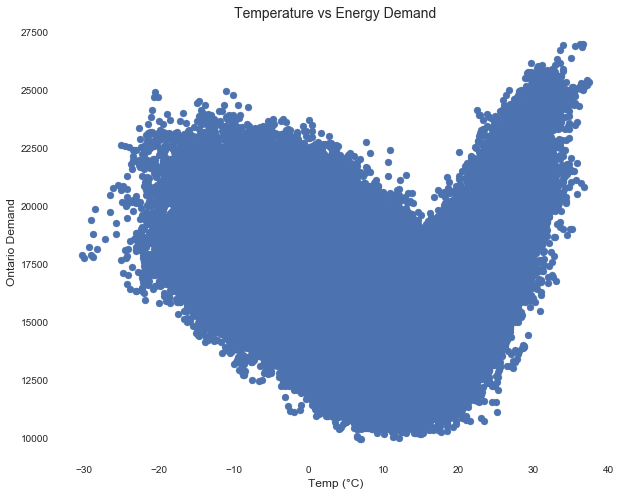

In [43]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
ax.set_facecolor('white')
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()  
plt.scatter(weather_drop["Temp (°C)"], weather_drop["Ontario Demand"])
plt.xlabel('Temp (°C)', fontsize=12)
plt.ylabel('Ontario Demand', fontsize=12)
plt.title('Temperature vs Energy Demand', fontsize=14)
plt.show()

There is a very clear distinctive relationship between temperature and energy demand. We see that energy demand increases slowly as temperature decreases from 15°C and increases more rapidly as temperature increases from 15 °C. 

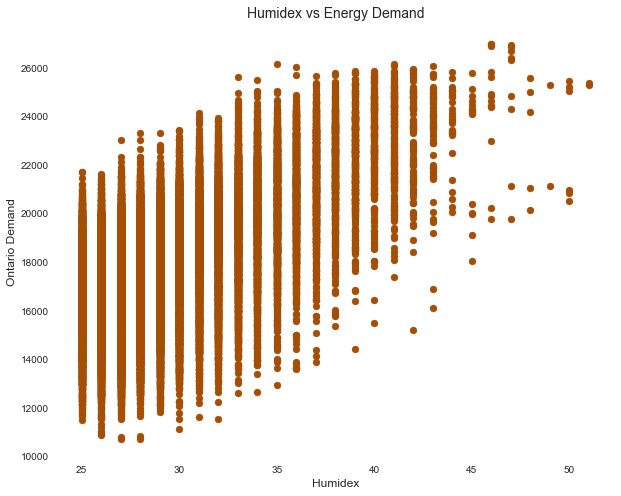

In [44]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
ax.set_facecolor('white')
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()  
plt.scatter(weather_drop["Hmdx"], weather_drop["Ontario Demand"],color='#a54e06')
plt.xlabel('Humidex', fontsize=12)
plt.ylabel('Ontario Demand', fontsize=12)
plt.title('Humidex vs Energy Demand', fontsize=14)
plt.show()

Here we see a slight postive relationship between Humidex and Energy demand with quite a few outliers.

In [53]:
weather_drop["demand_diff"] = weather_drop["Ontario Demand"].diff()
weather_drop["temp_diff"] = weather_drop["Temp (°C)"].diff()
#weather_drop["absolute_temp_diff"]=weather_drop["temp_diff"].abs()

In [54]:
weather_drop.sort_values(by="demand_diff",ascending=False).head(10)

,Date/Time,Data Quality,Temp (°C),Temp Flag,Dew Point Temp (°C),Dew Point Temp Flag,Rel Hum (%),Rel Hum Flag,Wind Dir (10s deg),Wind Dir Flag,...,Stn Press (kPa),Stn Press Flag,Hmdx,Wind Chill,Weather,Ontario Demand,Total Market Demand,demand_diff,temp_diff,absolute_temp_diff
126639,2016-08-10 15:00:00,,32.4,NaN,17.7,NaN,42.0,NaN,NaN,M,...,100.34,NaN,38.0,NaN,NaN,22587.0,23488.0,3942.0,-0.5,0.5
195072,2001-01-01 00:00:00,,-8.5,NaN,-11.3,NaN,80.0,NaN,1.0,NaN,...,99.85,NaN,NaN,-15.0,Mainly Clear,16434.0,NaN,3463.0,-20.3,20.3
136656,1994-02-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17843.0,NaN,3265.0,NaN,NaN
168768,1998-01-01 00:00:00,,-14.4,NaN,-18.0,NaN,74.0,NaN,24.0,NaN,...,100.45,NaN,NaN,-17.0,Clear,16277.0,NaN,3088.0,-23.2,23.2
78216,2011-02-01 00:00:00,,-10.7,NaN,-18.5,NaN,53.0,NaN,NaN,M,...,101.58,NaN,NaN,NaN,NaN,17826.0,19658.0,2854.0,-14.0,14.0
32144,2006-01-30 08:00:00,,5.7,NaN,4.4,NaN,91.0,NaN,NaN,M,...,98.91,NaN,NaN,NaN,NaN,18895.0,19438.0,2831.0,-0.8,0.8
160008,1997-01-01 00:00:00,,-14.3,NaN,-16.7,NaN,82.0,NaN,3.0,NaN,...,101.02,NaN,NaN,-23.0,Snow Showers,15681.0,NaN,2762.0,-27.7,27.7
177528,1999-01-01 00:00:00,,-9.3,NaN,-12.7,NaN,76.0,NaN,25.0,NaN,...,99.26,NaN,NaN,-18.0,Clear,16145.0,NaN,2600.0,-25.3,25.3
15559,2004-11-08 07:00:00,,1.4,NaN,-3.4,NaN,70.0,NaN,NaN,M,...,100.65,NaN,NaN,NaN,NaN,16501.0,17608.0,2371.0,-0.4,0.4
43152,2007-02-01 00:00:00,,-6.3,NaN,-10.7,NaN,71.0,NaN,NaN,M,...,100.01,NaN,NaN,NaN,NaN,18334.0,19127.0,2350.0,-6.7,6.7


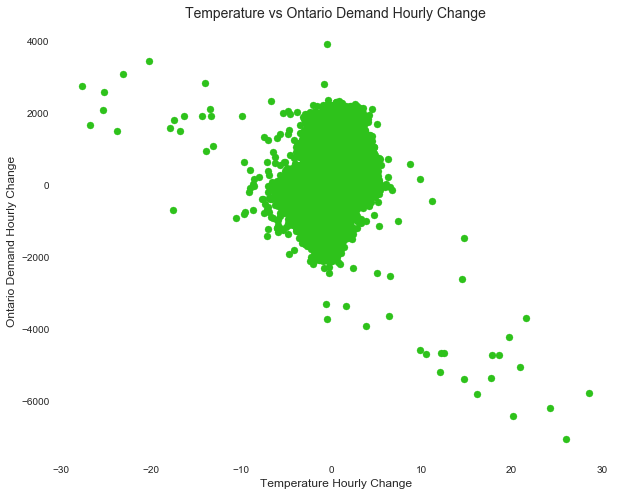

In [55]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
ax.set_facecolor('white')
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()  
plt.scatter(weather_drop.temp_diff,weather_drop.demand_diff,color='#2ec21b')
plt.xlabel('Temperature Hourly Change', fontsize=12)
plt.ylabel('Ontario Demand Hourly Change', fontsize=12)
plt.title('Temperature vs Ontario Demand Hourly Change', fontsize=14)
plt.show()

There seems to be some interesting very high spikes in energy demand when the temperature decreases rapidly. Conversely, when the weather warms rapidly there is significant decrease in the energy demand.

Look into when there is a weather flag. How is energy demand different during those hours?

In [60]:
weather_drop[weather_drop.Weather.notnull()].describe()

,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Wind Dir (10s deg),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Hmdx,Wind Chill,Ontario Demand,Total Market Demand,demand_diff,temp_diff,absolute_temp_diff
count,73616.000000,73615.000000,73615.000000,69304.000000,73616.000000,73616.000000,73612.000000,9993.000000,16588.000000,72871.000000,743.000000,72868.000000,73512.000000,73512.000000
mean,8.327866,2.736361,70.124159,22.444332,15.194238,21.264277,99.524267,29.425498,-11.867736,16261.930370,16116.087483,0.011569,0.000303,0.744372
std,10.824733,10.025348,16.164730,9.895376,9.711070,9.570401,0.758023,3.672502,6.390848,2452.236668,1934.536056,633.719366,1.068144,0.766051
min,-30.300000,-36.100000,16.000000,1.000000,0.000000,0.000000,96.560000,25.000000,-40.000000,9952.000000,12461.000000,-7066.000000,-27.700000,0.000000
25%,0.400000,-4.400000,59.000000,14.000000,7.000000,16.100000,99.060000,27.000000,-16.000000,14416.000000,14278.500000,-362.000000,-0.600000,0.200000
50%,8.100000,2.400000,72.000000,25.000000,13.000000,24.100000,99.550000,29.000000,-11.000000,16372.000000,15941.000000,-47.000000,-0.100000,0.500000
75%,17.200000,11.100000,82.000000,31.000000,20.000000,25.000000,100.000000,31.000000,-7.000000,18025.000000,17865.000000,300.000000,0.500000,1.000000
max,37.200000,26.600000,100.000000,36.000000,76.000000,40.200000,102.390000,50.000000,-1.000000,25239.000000,20372.000000,3463.000000,28.600000,28.600000


In [61]:
weather_drop.describe()

,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Wind Dir (10s deg),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Hmdx,Wind Chill,Ontario Demand,Total Market Demand,demand_diff,temp_diff,absolute_temp_diff
count,204602.000000,204602.000000,204602.000000,69305.000000,75005.000000,73619.000000,198947.000000,32567.000000,16589.000000,206064.000000,133800.000000,206060.000000,203443.000000,203443.000000
mean,9.311475,3.769798,70.503920,22.444499,14.913232,21.264546,99.961040,29.863881,-11.868346,16447.448104,18207.168438,-0.006566,0.000023,0.665475
std,10.667266,10.206470,16.413046,9.895402,9.836360,9.570469,0.842776,3.811846,6.391140,2566.930156,2527.022403,648.712169,0.958565,0.689918
min,-30.300000,-36.100000,9.000000,1.000000,0.000000,0.000000,96.550000,25.000000,-40.000000,9952.000000,11491.000000,-8921.000000,-27.700000,0.000000
25%,1.200000,-3.600000,60.000000,14.000000,7.000000,16.100000,99.420000,27.000000,-16.000000,14523.000000,16318.000000,-356.000000,-0.500000,0.200000
50%,9.400000,3.900000,72.000000,25.000000,13.000000,24.100000,99.980000,29.000000,-11.000000,16434.000000,18129.000000,-29.000000,-0.100000,0.500000
75%,18.200000,12.300000,83.000000,31.000000,20.000000,25.000000,100.520000,32.000000,-7.000000,18230.000000,19891.000000,330.000000,0.400000,0.900000
max,37.400000,26.700000,100.000000,36.000000,76.000000,40.200000,102.980000,51.000000,-1.000000,27005.000000,27999.000000,3942.000000,28.600000,28.600000


When there is a weather flag it seems like there is slightly less energy demand.